In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset/abalone.csv',names=['Sex','Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight','Viscera_weight', 'Shell_weight', 'Rings'])
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.shape

(4177, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [6]:
df['Sex'] = df['Sex'].map({'M':0,'F':1,'I':2})

In [7]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


<Axes: >

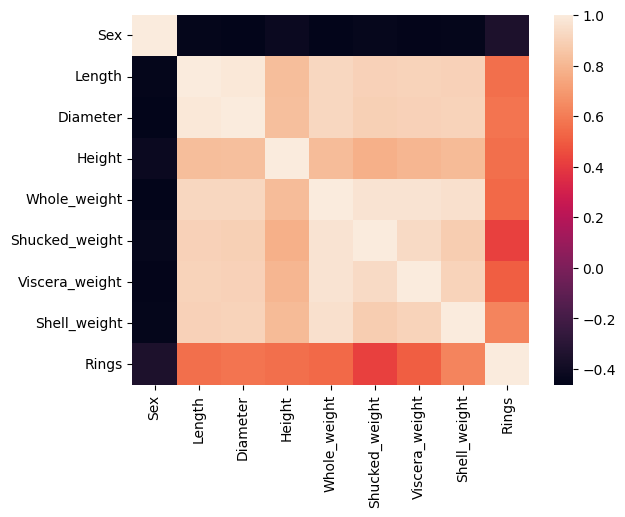

In [8]:
import seaborn as sns

sns.heatmap(df.corr())

- Sex is no where related to rings

In [9]:
# Dropping the Sex column

df.drop('Sex',axis=1,inplace=True)
df.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [10]:
# Splitting into train and test sets

from sklearn.model_selection import train_test_split

X = df.drop('Rings',axis=1)
y = df['Rings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3341, 7), (836, 7), (3341,), (836,))

In [34]:
from sklearn.metrics import r2_score, mean_squared_log_error, mean_squared_error
import math
    
def evaluate(y_true, y_pred):
    """
    Evaluates the performance of the model
    """
    # val =0
    # for i in range(len(y_true)):
    #     yh = y_pred[i]
    #     y = y_true.values[i]

    #     val = val + (math.log(1+yh) - math.log(1+y))**2
    
    # mean_val = val/len(y_pred)

    # return math.sqrt(mean_val)

    mse = mean_squared_error(y_true, y_pred)
    
    # rmsle = math.sqrt(msle)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

In [35]:
# Building Models

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [40]:
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_train_pred = lr.predict(X_train)

# val =0
# for i in range(len(y_true)):
#     yh = y_pred[i]
#     y = y_true[i]

#     val = val + (math.log(1+yh) - math.log(1+y))**2

# mean_val = val/len(y_pred)

# RMSLE = math.sqrt(mean_val)

RMSLE, R2  = evaluate(y_train, lr_train_pred)
print("TRAINING SCORE | MSE: {} | R2: {}".format(RMSLE, R2))
# print("TRAINING SCORE | RMSLE: {} ".format(RMSLE))

lr_test_pred = lr.predict(X_test)
RMSLE, R2 = evaluate(y_test, lr_test_pred)
print("TRAINING SCORE | RMSLE: {} | R2: {}".format(RMSLE, R2))

TRAINING SCORE | MSE: 4.901222095651982 | R2: 0.5288504405591017
TRAINING SCORE | RMSLE: 5.247883180028787 | R2: 0.4924862729935099


In [41]:
dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)

dt_train_pred = dt.predict(X_train)

RMSLE, R2 = evaluate(y_train, dt_train_pred)

print("TRAINING SCORE | MSE: {} | R2: {}".format(RMSLE, R2))

dt_test_pred = dt.predict(X_test)

RMSLE, R2 = evaluate(y_test, dt_test_pred)

print("TRAINING SCORE | RMSLE: {} | R2: {}".format(RMSLE, R2))


TRAINING SCORE | MSE: 0.0 | R2: 1.0
TRAINING SCORE | RMSLE: 9.340909090909092 | R2: 0.09665679975557817


In [69]:
rf = RandomForestRegressor(n_estimators=800, max_depth=100)    

rf.fit(X_train, y_train)

rf_train_pred = rf.predict(X_train)

RMSLE, R2 = evaluate(y_train, rf_train_pred)

print("TRAINING SCORE | MSE: {} | R2: {}".format(RMSLE, R2))

rf_test_pred = rf.predict(X_test)

RMSLE, R2 = evaluate(y_test, rf_test_pred)

print("TRAINING SCORE | RMSLE: {} | R2: {}".format(RMSLE, R2))


TRAINING SCORE | MSE: 0.6461404005163125 | R2: 0.9378871719952675
TRAINING SCORE | RMSLE: 4.734926766223086 | R2: 0.5420934026554523


In [51]:
gb = GradientBoostingRegressor(n_estimators=150)    

gb.fit(X_train, y_train)

gb_train_pred = gb.predict(X_train)

RMSLE, R2 = evaluate(y_train, gb_train_pred)

print("TRAINING SCORE | MSE: {} | R2: {}".format(RMSLE, R2))

gb_test_pred = gb.predict(X_test)

RMSLE, R2 = evaluate(y_test, gb_test_pred)

print("TRAINING SCORE | RMSLE: {} | R2: {}".format(RMSLE, R2))


TRAINING SCORE | MSE: 3.3539860631664475 | R2: 0.6775846870041551
TRAINING SCORE | RMSLE: 4.672005193734013 | R2: 0.5481784393583583


In [44]:
xgb = XGBRegressor()

xgb.fit(X_train, y_train)

xgb_train_pred = xgb.predict(X_train)

RMSLE, R2 = evaluate(y_train, xgb_train_pred)

print("TRAINING SCORE | MSE: {} | R2: {}".format(RMSLE, R2))

xgb_test_pred = xgb.predict(X_test)

RMSLE, R2 = evaluate(y_test, xgb_test_pred)

print("TRAINING SCORE | RMSLE: {} | R2: {}".format(RMSLE, R2))

TRAINING SCORE | MSE: 0.6262599338418671 | R2: 0.9397982612975568
TRAINING SCORE | RMSLE: 5.601488100634669 | R2: 0.45828975127452964


In [66]:
cat = CatBoostRegressor(iterations=2000, learning_rate=0.005)

cat.fit(X_train, y_train)

cat_train_pred = cat.predict(X_train)

RMSLE, R2 = evaluate(y_train, cat_train_pred)

print("TRAINING SCORE | MSE: {} | R2: {}".format(RMSLE, R2))

cat_test_pred = cat.predict(X_test)

RMSLE, R2 = evaluate(y_test, cat_test_pred)

print("TRAINING SCORE | RMSLE: {} | R2: {}".format(RMSLE, R2))


0:	learn: 3.2194258	total: 2.21ms	remaining: 4.42s
1:	learn: 3.2139705	total: 4.43ms	remaining: 4.42s
2:	learn: 3.2084596	total: 6.16ms	remaining: 4.1s
3:	learn: 3.2024385	total: 7.78ms	remaining: 3.88s
4:	learn: 3.1958639	total: 9.55ms	remaining: 3.81s
5:	learn: 3.1901811	total: 11.5ms	remaining: 3.81s
6:	learn: 3.1837424	total: 13.9ms	remaining: 3.96s
7:	learn: 3.1775364	total: 16.3ms	remaining: 4.05s
8:	learn: 3.1716659	total: 18.2ms	remaining: 4.02s
9:	learn: 3.1654341	total: 20.5ms	remaining: 4.08s
10:	learn: 3.1595630	total: 22.4ms	remaining: 4.05s
11:	learn: 3.1534735	total: 25.1ms	remaining: 4.16s
12:	learn: 3.1476100	total: 27.2ms	remaining: 4.15s
13:	learn: 3.1422170	total: 29.3ms	remaining: 4.16s
14:	learn: 3.1367314	total: 31.4ms	remaining: 4.16s
15:	learn: 3.1309179	total: 33.5ms	remaining: 4.16s
16:	learn: 3.1259767	total: 35.6ms	remaining: 4.16s
17:	learn: 3.1200719	total: 37.6ms	remaining: 4.14s
18:	learn: 3.1141660	total: 39.9ms	remaining: 4.16s
19:	learn: 3.1086475	to

___________________

In [106]:
test_df = pd.read_csv('dataset/test.csv')
test_df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [107]:
['Sex','Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight','Viscera_weight', 'Shell_weight', 'Rings']

test_df.rename(columns = {'Whole weight':'Whole_weight'}, inplace=True)
test_df.rename(columns = {'Whole weight.1':'Shucked_weight'}, inplace=True)
test_df.rename(columns = {'Whole weight.2':'Viscera_weight'}, inplace=True)
test_df.rename(columns = {'Shell weight':'Shell_weight'}, inplace=True)

In [108]:
test_df.head()


,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [109]:
id = test_df['id']
test_df = test_df.drop(columns=['id','Sex'], axis=1)

In [110]:
id.head()

0    90615
1    90616
2    90617
3    90618
4    90619
Name: id, dtype: int64

In [111]:
test_df.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [113]:
y_sub = rf.predict(test_df)
y_sub.round()

array([10.,  9., 11., ..., 14., 13.,  8.])

In [117]:
y_sub = y_sub.round()

In [123]:
y_df = pd.DataFrame()

In [125]:
y_df['id'] = id

In [127]:
y_df['Rings'] = y_sub

In [129]:
y_df

,id,Rings
0,90615,10.0
1,90616,9.0
2,90617,11.0
3,90618,11.0
4,90619,8.0
...,...,...
60406,151021,6.0
60407,151022,9.0
60408,151023,14.0
60409,151024,13.0


In [132]:
y_df.to_csv('result.csv', index=None)